In [ ]:
%pip install -r requirements.txt

# Programació d'Intel·ligència Artificial. Lliurament 6

Hi ha tres preguntes: la primera de programació de xarxes neuronals convolucionals i la segona d'aplicació a la transferència d'estil.

Totes Les preguntes valen 2.5 punts. Dins cada pregunta, tots els apartats tenen el mateix pes.

# Pregunta 1. De xarxes neuronals densament connectades a xarxes convolucionals.

En aquesta pregunta, preneu com a referència el següent classificador d'imatges de la web de TensorFlow (https://www.tensorflow.org/tutorials/keras/classification). Modificau la construcció del model seguint les indicacions dels apunts (https://iedib.net/avirtual/mod/book/view.php?id=61663&chapterid=72084).

a) Definiu el model com a seqüencial.

b) Afegiu una primera capa convolucional. Especificau la mida de l'entrada d'acord amb les imatges (input_size). Quants de filtres té? De quina mida?

c) Afegiu una capa de max-pooling 2x2.

d) Construïu un segon bloc convolucional, seguint l'esquema dels apunts. Quants de filtres té?

e) Quina precisió obté aquest model en el conjunt de test? Millora el resultat respecte del del tutorial?



-------------------------
Train and Test data shape
Train images shape:  (60000, 28, 28)
Train labels length:  60000
Train labels:  [9 0 0 ... 3 0 5]
Test labels length:  10000
-------------------------


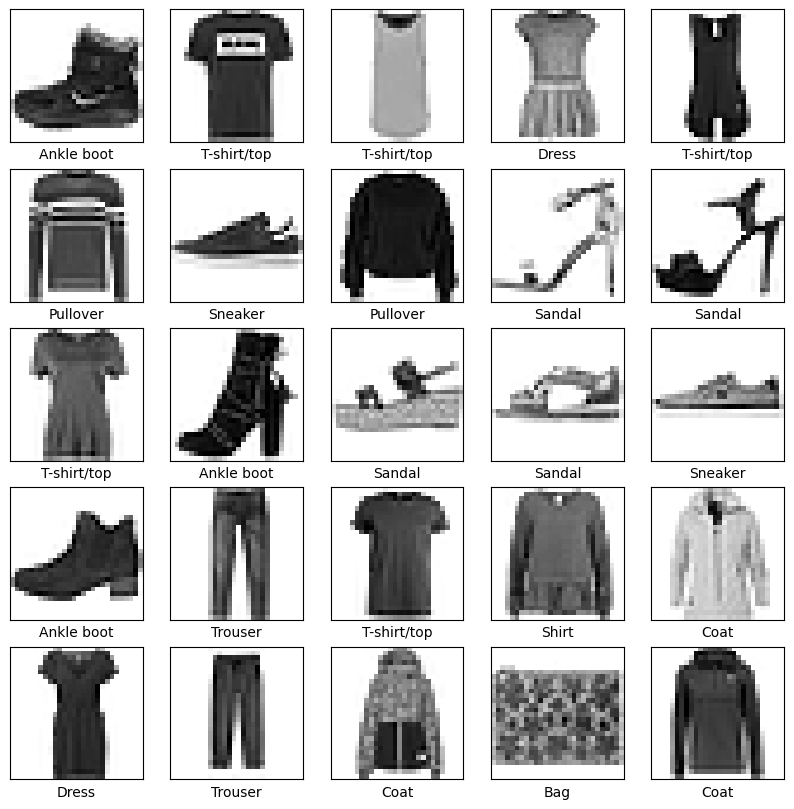

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

mnist = keras.datasets.fashion_mnist
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('-------------------------')
print('Train and Test data shape')
print('Train images shape: ',train_images.shape)
print('Train labels length: ', len(train_labels))
print('Train labels: ', train_labels)
print('Test labels length: ',len(test_labels))
print('-------------------------')

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])
plt.show()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [28]:
# (a) Define the sequential model
model = Sequential()
# (b) Add a convolutional layer -> 32 filters, 5x5 kernel size
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
# (c) Add a pooling layer of 2x2 window size
model.add(MaxPooling2D((2,2)))
# (d) Add second convolutional layer -> 64 filters, 5x5 kernel size
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'),)
model.add(Dense(10,activation='softmax'))

model.summary() 

/Users/carlos/Development/IEDIB_CEIA_2024-25/Programacion de Inteligencia Artificial/Bloque 6/6.1/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,586 (721.04 KB)

 Trainable params: 184,586 (721.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)  
print('Test loss:', test_loss)

"""(e)
Tensorflow Keras tutorial accuracy output: 
	313/313 - 0s - loss: 0.3350 - accuracy: 0.8840
	Test accuracy: 0.8840000033378601

My accuracy output:
	313/313 - 1s 4ms/step - accuracy: 0.9082 - loss: 0.3794
	Test accuracy: 0.9085000157356262

This means that this case optimizes the one shown in the tutorial by a bit more than 2%.
"""

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7670 - loss: 0.6442
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8836 - loss: 0.3171
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9044 - loss: 0.2613
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9166 - loss: 0.2287
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9238 - loss: 0.2059
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9325 - loss: 0.1812
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9394 - loss: 0.1619
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9425 - loss: 0.1498
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9516 - loss: 0.1303
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9570 - loss: 0.1155
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9092 - loss: 0.3085
Test accuracy: 0.9093999862670898
Test l

'(e)\nTensorflow Keras tutorial accuracy output: \n\t313/313 - 0s - loss: 0.3350 - accuracy: 0.8840\n\tTest accuracy: 0.8840000033378601\n\nMy accuracy output:\n\t313/313 - 1s 4ms/step - accuracy: 0.9082 - loss: 0.3794\n\tTest accuracy: 0.9085000157356262\n\nThis means that this case optimizes the one shown in the tutorial by a bit more than 2%.\n'

# Pregunta 2. Nombre de paràmetres de les capes convolucionals

Aquesta pregunta es basa en un exemple de classificació d'imatges a partir de la base de dades MNIST.
https://keras.io/examples/vision/mnist_convnet/

Executau l'exemple a partir del quadern Colab que se us dona i responeu les qüestions següents.

**a) Obteniu el nombre de paràmetres entrenables de la primera capa a partir de la mida dels filtres i les imatges d'entrada. Teniu en compte el biaix.**

32 * (3 * 3 * 1 + 1) = **320** (lo cual coincide con lo mostrado en el _summary()_)

**b) Quina és la mida de la sortida de la primera capa de max-pooling? Això ho necessitareu a l'apartat següent.**

Como se muestra en el _summary()_, la dimensión de salida de la primera capa de max-pooling es **(13, 13, 32)**.

**c) Obteniu el nombre de paràmetres entrenables de la segona capa ( a partir de la mida de la sortida de la capa anterior de pooling, el nombre de filtres i la seva mida.**

64 * (3 * 3 * 32 + 1) = **18496** (lo cual coincide con lo mostrado en el _summary()_)

**d) Comprovau si eliminant la capa de Dropout final els resultats de classificació del model empitjoren.**

In [30]:
# WITH DROP OUT
model = Sequential([
	keras.Input(shape=(28, 28, 1)),
	Conv2D(32, (3, 3), activation='relu'),
	MaxPooling2D((2,2)),
	Conv2D(64, (3, 3), activation='relu'),
	MaxPooling2D((2,2)),
	Flatten(),
	Dropout(0.5),
	Dense(10,activation='softmax')
])
model.summary() 

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size=128, epochs=15, validation_split=0.1)

score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6432 - loss: 1.0067 - val_accuracy: 0.8345 - val_loss: 0.4433
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8289 - loss: 0.4668 - val_accuracy: 0.8588 - val_loss: 0.3888
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8486 - loss: 0.4185 - val_accuracy: 0.8718 - val_loss: 0.3505
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8616 - loss: 0.3867 - val_accuracy: 0.8818 - val_loss: 0.3283
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8721 - loss: 0.3545 - val_accuracy: 0.8853 - val_loss: 0.3221
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8780 - loss: 0.3394 - val_accuracy: 0.8865 - val_loss: 0.3117
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8822 - loss: 0.3225 - val_accuracy: 0.8900 - val_loss: 0.2995
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8832 - loss: 0.3208 - val_accu

In [32]:
# WITHOUT DROP OUT
model = Sequential([
	keras.Input(shape=(28, 28, 1)),
	Conv2D(32, (3, 3), activation='relu'),
	MaxPooling2D((2,2)),
	Conv2D(64, (3, 3), activation='relu'),
	MaxPooling2D((2,2)),
	Flatten(),
	Dense(10,activation='softmax')
])
model.summary() 

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size=128, epochs=15, validation_split=0.1)

score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6768 - loss: 0.9249 - val_accuracy: 0.8385 - val_loss: 0.4368
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8553 - loss: 0.4073 - val_accuracy: 0.8683 - val_loss: 0.3635
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8736 - loss: 0.3501 - val_accuracy: 0.8802 - val_loss: 0.3287
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8850 - loss: 0.3227 - val_accuracy: 0.8845 - val_loss: 0.3215
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8892 - loss: 0.3031 - val_accuracy: 0.8882 - val_loss: 0.3092
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8971 - loss: 0.2805 - val_accuracy: 0.8920 - val_loss: 0.2942
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9050 - loss: 0.2659 - val_accuracy: 0.8917 - val_loss: 0.2879
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9080 - loss: 0.2561 - val_accu

With Dropout:
	
	Test loss: 0.2806633412837982
	Test accuracy: 0.8988000154495239

Without Dropout:
	
	Test loss: 0.27794745564460754
	Test accuracy: 0.8982999920845032

>The difference is barely noticeable

# Pregunta 3. Transferència d'estil

En aquesta pregunta aprendreu a transformar una imatge segons l'estil d'una altra. Per això aplicareu el codi de l'exemple https://www.tensorflow.org/tutorials/generative/style_transfer a unes imatges vostres.

a) Triau una imatge d'un animal, extreta per exemple de Wikimedia.

b) Triau tres imatges de diversos pintors. Per exemple: Matisse, Monet, Mondrian, Miró o Van Gogh poden donar bon resultat. Afegiu les imatges

c) Obteniu la transformació de la imatge original amb els tres estils que heu triat. Quina dona més bon resultat?

En aquesta pregunta no és necessari que lliureu el vostre codi, basta inserir les vostres set imatges: una fotografia sense transformar, tres quadres de pintors i tres imatges transformades.

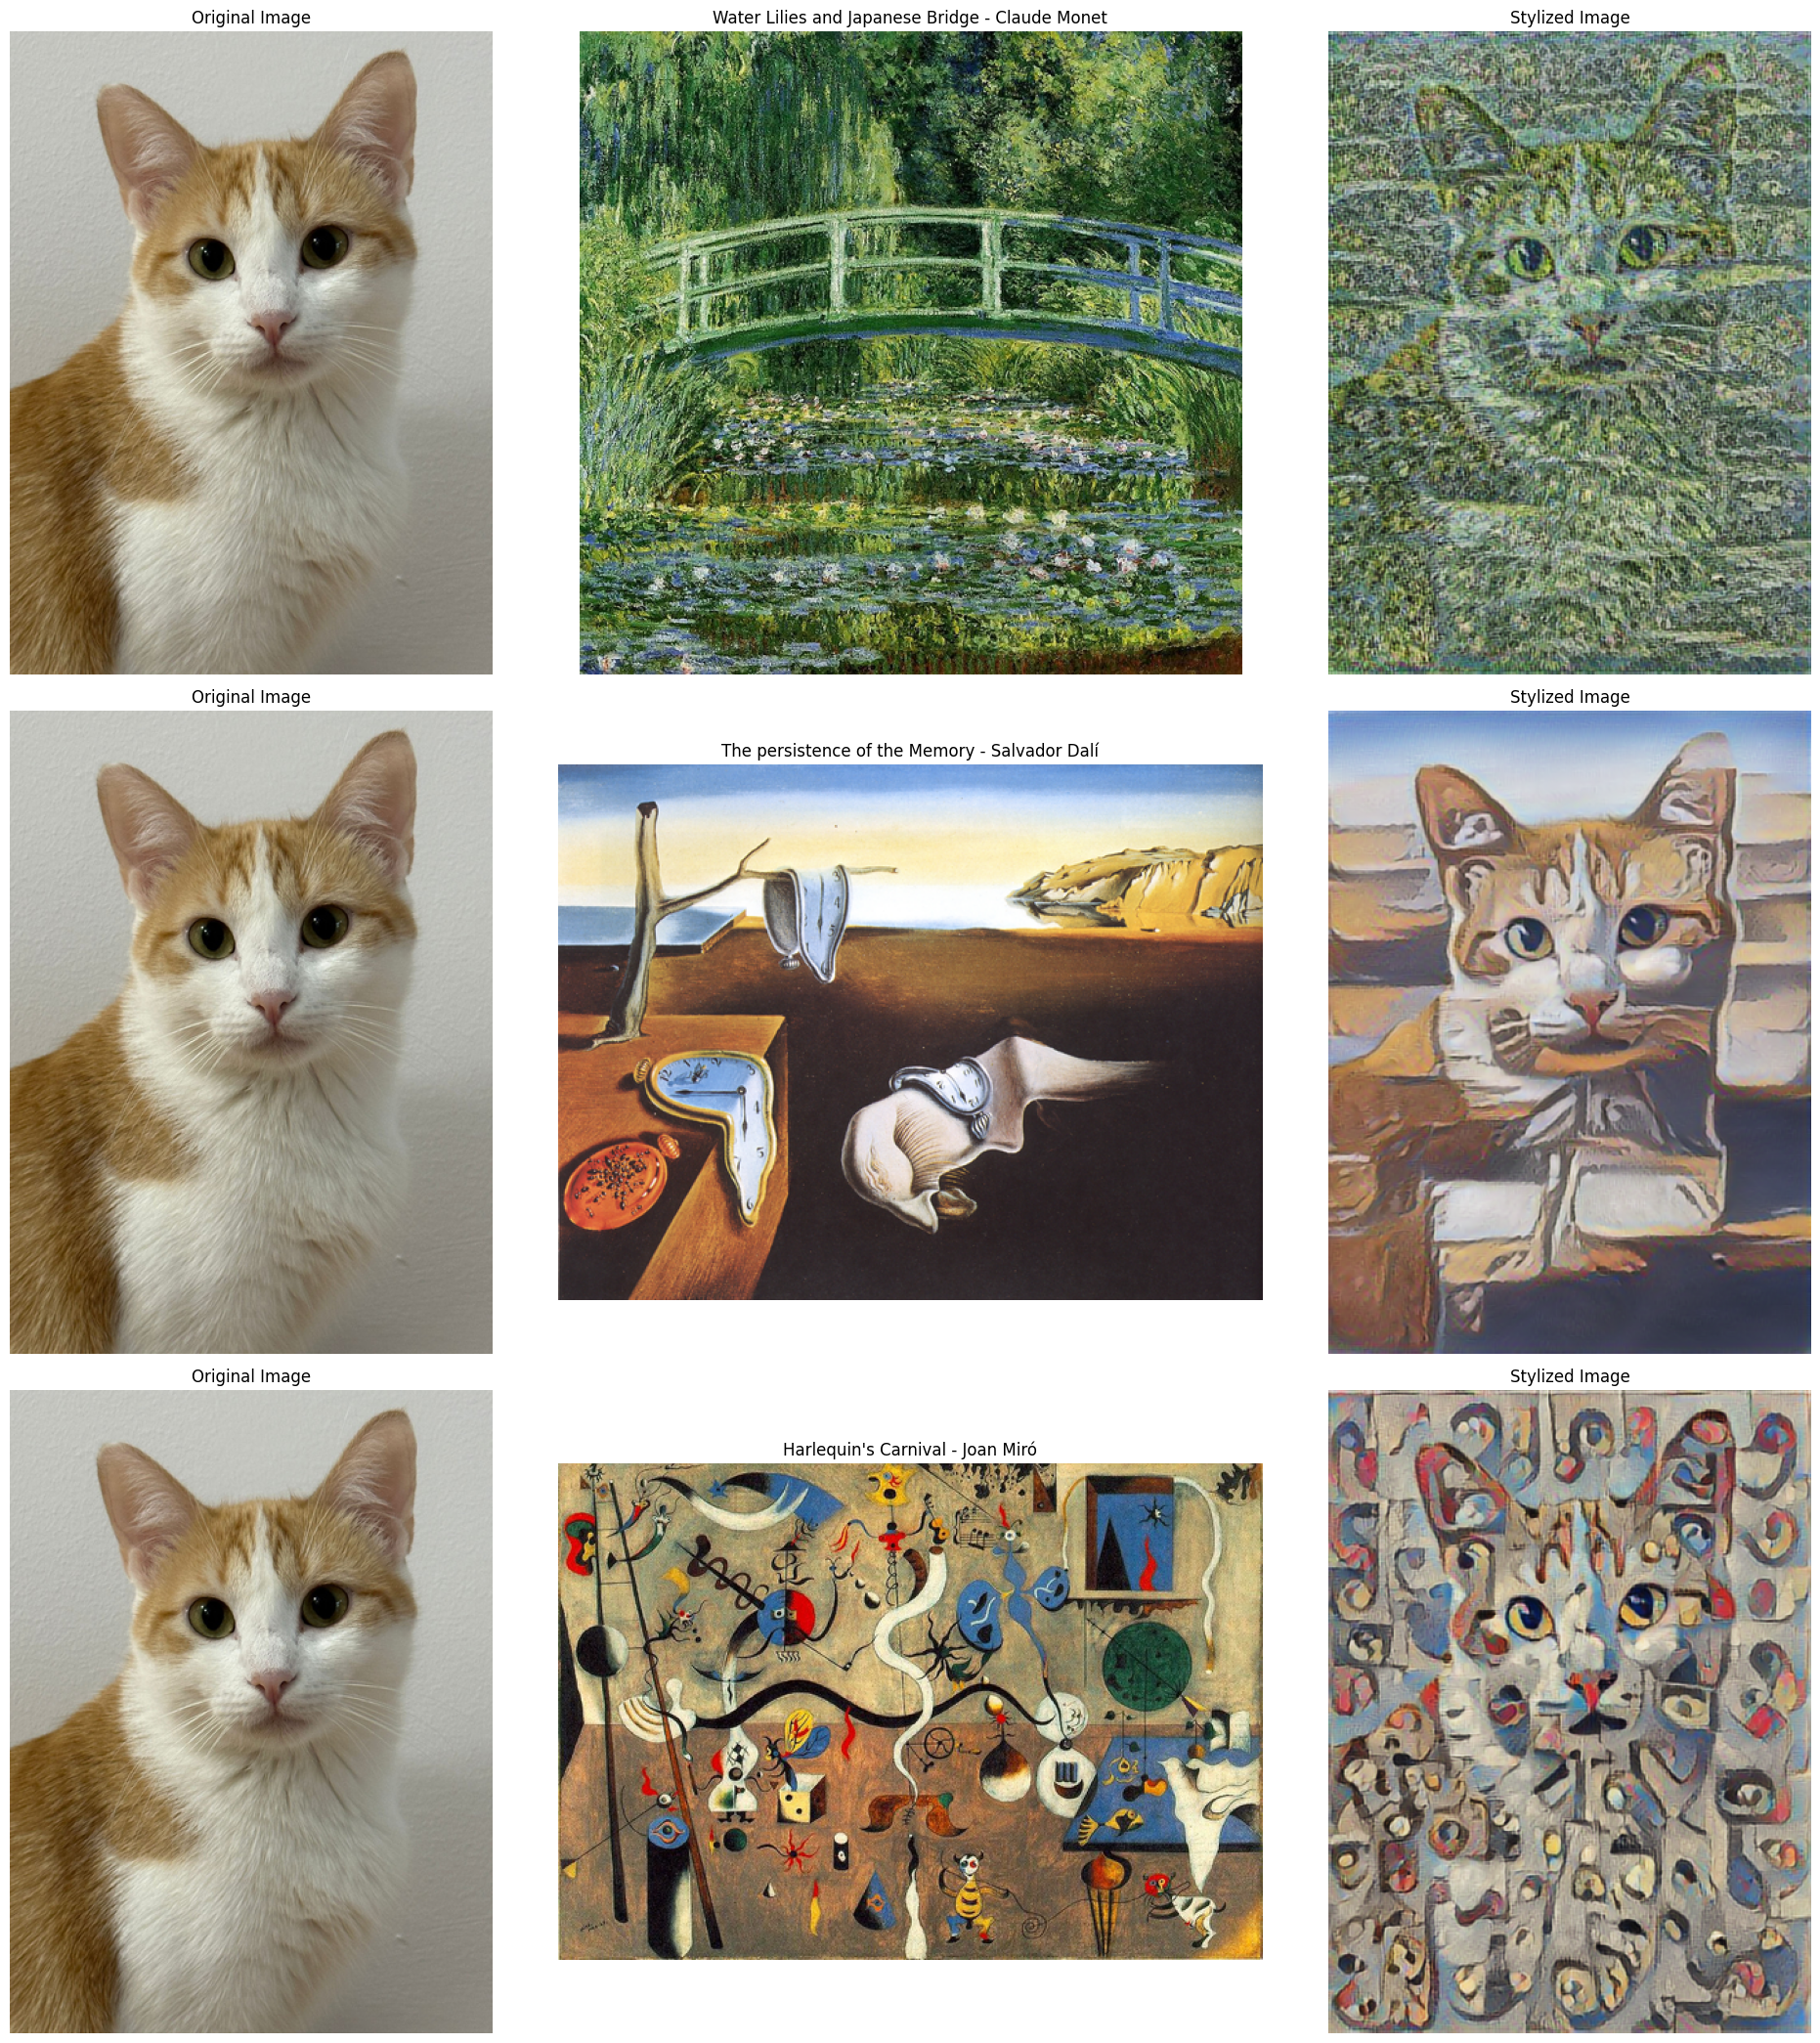

In [76]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

def load_image(url, max_dim=512):
	response = requests.get(url)
	image = PIL.Image.open(BytesIO(response.content))
	image = image.convert('RGB')
	long = max(image.size)
	scale = max_dim / long
	image = image.resize((round(image.size[0] * scale), round(image.size[1] * scale)), PIL.Image.LANCZOS)
	image = np.array(image)[np.newaxis, ...] / 255.0
	return tf.convert_to_tensor(image, dtype=tf.float32)

def imshow(image, title=None):
	if len(image.shape) > 3:
		image = tf.squeeze(image, axis=0)
	plt.imshow(image)
	if title:
		plt.title(title)
	plt.axis('off')
	plt.show()

animal_image_url = 'https://i.postimg.cc/J0dJpxYm/petruski.jpg'
style_images_data = [
	{'author': 'Claude Monet', 'title': 'Water Lilies and Japanese Bridge','url':'https://www.singulart.com/blog/wp-content/uploads/2023/10/Water-Lilies-and-Japanese-Bridge.jpg'},
	{'author': 'Salvador Dalí', 'title': 'The persistence of the Memory','url':'https://www.singulart.com/blog/wp-content/uploads/2019/08/the-persistence-of-memory-1931.jpg'},
   {'author': 'Joan Miró', 'title': 'Harlequin\'s Carnival','url':'https://live.staticflickr.com/1318/1370475730_134d7e9476_c.jpg'}
]
content_image = load_image(animal_image_url)
style_images = [load_image(image['url']) for image in style_images_data]

hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
styled_images = [hub_module(tf.constant(content_image), tf.constant(style))[0] for style in style_images]

fig, axes = plt.subplots(3, 3, figsize=(21, 21))

for i, (style_image, styled_image) in enumerate(zip(style_images, styled_images)):
	axes[i, 0].imshow(tf.squeeze(content_image, axis=0))
	axes[i, 0].set_title('Original Image')
	axes[i, 0].axis('off')

	axes[i, 1].imshow(tf.squeeze(style_image, axis=0))
	axes[i, 1].set_title(f"{style_images_data[i]['title']} - {style_images_data[i]['author']}")
	axes[i, 1].axis('off')

	axes[i, 2].imshow(tf.squeeze(styled_image, axis=0))
	axes[i, 2].set_title('Stylized Image')
	axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

# Pregunta 4. Exemple de CNN amb keras

**Triau un exemple sistema de visió utilitzant xarxes neuronals convolucionals implementat en keras del catàleg https://keras.io/examples/vision/ i realitzau quatre activitats, seguint aquest guió.**

**a) Descripció del sistema.**

Se trata de un experimento de redes neuronales convulcionales que usa la arquitectura U-Net para la segmentación de imágenes.

**b) Quins paràmetres pensau que poden influir en el rendiment.**

- Tamaño de las imágenes: La resolución de las imágenes de entrada afecta a la capacidad del modelo para capturar detalles. Imágenes de mayor tamaño pueden proporcionar más información, pero también aumentan la carga computacional.
- Número de filtros en las capas convolucionales: Determina la capacidad del modelo para aprender características complejas. Un número inadecuado de filtros puede limitar el rendimiento del modelo.
- Función de pérdida: La elección de la función de pérdida afecta directamente a la forma en que el modelo aprende. Una función de pérdida inadecuada puede conducir a un aprendizaje subóptimo. ￼
- Optimizador y tasa de aprendizaje: El optimizador controla cómo se actualizan los pesos del modelo durante el entrenamiento. La tasa de aprendizaje determina la magnitud de las actualizaciones. Valores inadecuados pueden provocar una convergencia lenta o que el modelo no converja. ￼
- Tamaño del lote (batch size): Influye en la estabilidad y eficiencia del entrenamiento. Lotes más grandes pueden proporcionar estimaciones más estables de los gradientes, pero requieren mayor memoria.
- Número de épocas: Determina cuánto tiempo se entrena el modelo. Un número insuficiente de épocas puede resultar en un modelo subentrenado, mientras que un número excesivo puede causar sobreajuste.

**c) Modificació dels valors d'aquests paràmetres.**

- Tamaño de las imágenes: Experimentar con resoluciones más altas, teniendo en cuenta las limitaciones de memoria y tiempo de procesamiento.
- Número de filtros: Aumentar progresivamente el número de filtros en las capas convolucionales para permitir que el modelo aprenda características más complejas, asegurándose de no introducir sobreajuste.
- Función de pérdida: Probar funciones de pérdida alternativas, especialmente si se decide utilizar máscaras one-hot en lugar de etiquetas enteras.
- Optimizador y tasa de aprendizaje: Experimentar con distintos optimizadores, y ajustar la tasa de aprendizaje para encontrar el equilibrio óptimo entre velocidad de aprendizaje y estabilidad.
- Tamaño del lote: Probar diferentes tamaños de lote, para encontrar un equilibrio entre la estabilidad del entrenamiento y el uso eficiente de la memoria.
- Número de épocas: Monitorizar la pérdida de validación durante el entrenamiento y utilizar técnicas como el early stopping para determinar el número óptimo de épocas, evitando así el sobreajuste.

**d) Comparació dels resultats obtinguts.**

In [11]:
!curl -L -o images.tar.gz https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!curl -L -o annotations.tar.gz https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   340  100   340    0     0   1127      0 --:--:-- --:--:-- --:--:--  1125
100  755M  100  755M    0     0  40.9M      0  0:00:18  0:00:18 --:--:-- 43.4M   0  0:00:31  0:00:02  0:00:29 39.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   345  100   345    0     0   1709      0 --:--:-- --:--:-- --:--:--  1716
100 18.2M  100 18.2M    0     0  13.9M      0  0:00:01  0:00:01 --:--:-- 19.1M


In [12]:
import os

input_dir = "images/"
target_dir = "annotations/trimaps/"
img_size = (160, 160)
num_classes = 3
batch_size = 32

input_img_paths = sorted(
	[
		os.path.join(input_dir, fname)
		for fname in os.listdir(input_dir)
		if fname.endswith(".jpg")
	]
)
target_img_paths = sorted(
	[
		os.path.join(target_dir, fname)
		for fname in os.listdir(target_dir)
		if fname.endswith(".png") and not fname.startswith(".")
	]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
	print(input_path, "|", target_path)

Number of samples: 7390
images/Abyssinian_1.jpg | annotations/trimaps/Abyssinian_1.png
images/Abyssinian_10.jpg | annotations/trimaps/Abyssinian_10.png
images/Abyssinian_100.jpg | annotations/trimaps/Abyssinian_100.png
images/Abyssinian_101.jpg | annotations/trimaps/Abyssinian_101.png
images/Abyssinian_102.jpg | annotations/trimaps/Abyssinian_102.png
images/Abyssinian_103.jpg | annotations/trimaps/Abyssinian_103.png
images/Abyssinian_104.jpg | annotations/trimaps/Abyssinian_104.png
images/Abyssinian_105.jpg | annotations/trimaps/Abyssinian_105.png
images/Abyssinian_106.jpg | annotations/trimaps/Abyssinian_106.png
images/Abyssinian_107.jpg | annotations/trimaps/Abyssinian_107.png


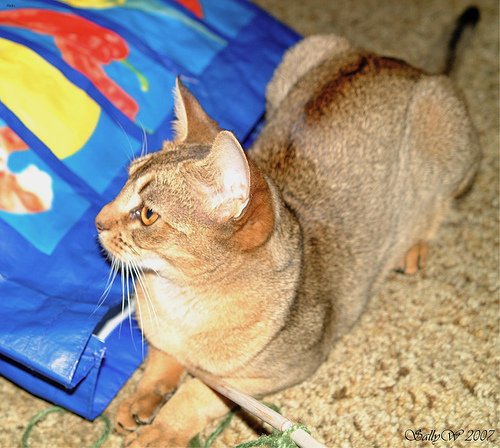

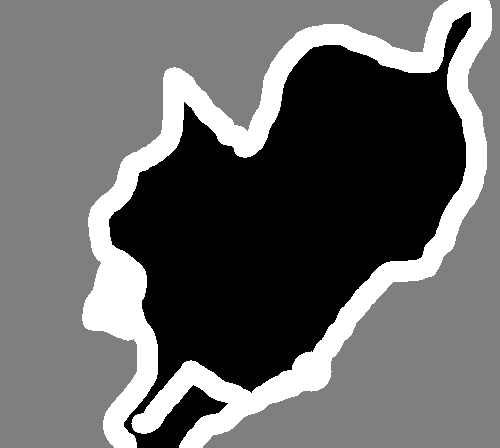

In [13]:
from IPython.display import Image, display
from keras.utils import load_img
from PIL import ImageOps

# Display input image #7
display(Image(filename=input_img_paths[9]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = ImageOps.autocontrast(load_img(target_img_paths[9]))
display(img)

In [14]:
import keras
import numpy as np
from tensorflow import data as tf_data
from tensorflow import image as tf_image
from tensorflow import io as tf_io


def get_dataset(
	batch_size,
	img_size,
	input_img_paths,
	target_img_paths,
	max_dataset_len=None,
):
	"""Returns a TF Dataset."""

	def load_img_masks(input_img_path, target_img_path):
		input_img = tf_io.read_file(input_img_path)
		input_img = tf_io.decode_png(input_img, channels=3)
		input_img = tf_image.resize(input_img, img_size)
		input_img = tf_image.convert_image_dtype(input_img, "float32")

		target_img = tf_io.read_file(target_img_path)
		target_img = tf_io.decode_png(target_img, channels=1)
		target_img = tf_image.resize(target_img, img_size, method="nearest")
		target_img = tf_image.convert_image_dtype(target_img, "uint8")

		# Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
		target_img -= 1
		return input_img, target_img

	# For faster debugging, limit the size of data
	if max_dataset_len:
		input_img_paths = input_img_paths[:max_dataset_len]
		target_img_paths = target_img_paths[:max_dataset_len]
	dataset = tf_data.Dataset.from_tensor_slices((input_img_paths, target_img_paths))
	dataset = dataset.map(load_img_masks, num_parallel_calls=tf_data.AUTOTUNE)
	return dataset.batch(batch_size)

In [15]:
from keras import layers


def get_model(img_size, num_classes):
	inputs = keras.Input(shape=img_size + (3,))

	### [First half of the network: downsampling inputs] ###

	# Entry block
	x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
	x = layers.BatchNormalization()(x)
	x = layers.Activation("relu")(x)

	previous_block_activation = x  # Set aside residual

	# Blocks 1, 2, 3 are identical apart from the feature depth.
	for filters in [64, 128, 256]:
		x = layers.Activation("relu")(x)
		x = layers.SeparableConv2D(filters, 3, padding="same")(x)
		x = layers.BatchNormalization()(x)

		x = layers.Activation("relu")(x)
		x = layers.SeparableConv2D(filters, 3, padding="same")(x)
		x = layers.BatchNormalization()(x)

		x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

		# Project residual
		residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
			previous_block_activation
		)
		x = layers.add([x, residual])  # Add back residual
		previous_block_activation = x  # Set aside next residual

	### [Second half of the network: upsampling inputs] ###

	for filters in [256, 128, 64, 32]:
		x = layers.Activation("relu")(x)
		x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
		x = layers.BatchNormalization()(x)

		x = layers.Activation("relu")(x)
		x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
		x = layers.BatchNormalization()(x)

		x = layers.UpSampling2D(2)(x)

		# Project residual
		residual = layers.UpSampling2D(2)(previous_block_activation)
		residual = layers.Conv2D(filters, 1, padding="same")(residual)
		x = layers.add([x, residual])  # Add back residual
		previous_block_activation = x  # Set aside next residual

	# Add a per-pixel classification layer
	outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

	# Define the model
	model = keras.Model(inputs, outputs)
	return model


# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 80, 80,    │        896 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 80, 80,    │        128 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 80, 80,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 80, 80,    │          0 │ activation[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d    │ (None, 80, 80,    │      2,400 │ activation_1[0][… │
│ (SeparableConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 80, 80,    │        256 │ separable_conv2d… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 80, 80,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_1  │ (None, 80, 80,    │      4,736 │ activation_2[0][… │
│ (SeparableConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 80, 80,    │        256 │ separable_conv2d… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 40, 40,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 40, 40,    │      2,112 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 40, 40,    │          0 │ max_pooling2d[0]… │
│                     │ 64)               │            │ conv2d_19[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 40, 40,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_2  │ (None, 40, 40,    │      8,896 │ activation_3[0][… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 40,    │        512 │ separable_conv2d… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 40, 40,    │          0 │ batch_normalizat

 Total params: 2,058,979 (7.85 MB)

 Trainable params: 2,055,203 (7.84 MB)

 Non-trainable params: 3,776 (14.75 KB)

In [16]:
import random

# Split our img paths into a training and a validation set
val_samples = 1000
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

# Instantiate dataset for each split
# Limit input files in `max_dataset_len` for faster epoch training time.
# Remove the `max_dataset_len` arg when running with full dataset.
train_dataset = get_dataset(
	batch_size,
	img_size,
	train_input_img_paths,
	train_target_img_paths,
	max_dataset_len=1000,
)
valid_dataset = get_dataset(
	batch_size, img_size, val_input_img_paths, val_target_img_paths
)

In [17]:
# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
model.compile(
	optimizer=keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy"
)

callbacks = [
	keras.callbacks.ModelCheckpoint("oxford_segmentation.keras", save_best_only=True)
]

# Train the model, doing validation at the end of each epoch.
epochs = 50
model.fit(
	train_dataset,
	epochs=epochs,
	validation_data=valid_dataset,
	callbacks=callbacks,
	verbose=2,
)

Epoch 1/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 47s - 1s/step - loss: 1.3122 - val_loss: 1.2799
Epoch 2/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.8267 - val_loss: 1.2179
Epoch 3/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.7304 - val_loss: 1.5895
Epoch 4/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.6751 - val_loss: 2.1646
Epoch 5/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.6347 - val_loss: 2.7692
Epoch 6/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.6015 - val_loss: 3.3780
Epoch 7/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.5718 - val_loss: 3.9569
Epoch 8/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.5433 - val_loss: 4.5011
Epoch 9/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.5150 - val_loss: 5.0037
Epoch 10/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.4864 - val_loss: 5.4610
Epoch 11/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 38s - 1s/step - loss: 0.4574 - val_loss: 5.8566
Epoch 12/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.4281 - val_loss: 6.1492
Epoch 13/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.3998 - val_loss: 6.2490
Epoch 14/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.3729 - val_loss: 6.0734
Epoch 15/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.3499 - val_loss: 5.6692
Epoch 16/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.3392 - val_loss: 4.6261
Epoch 17/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.4296 - val_loss: 2.2850
Epoch 18/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.3898 - val_loss: 1.4576
Epoch 19/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.3426 - val_loss: 1.3266
Epoch 20/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.3175 - val_loss: 1.4981
Epoch 21/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.3205 - val_loss: 1.9483
Epoch 22/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.3851 - val_loss: 1.3799
Epoch 23/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.3629 - val_loss: 0.7797
Epoch 24/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.3124 - val_loss: 0.7725
Epoch 25/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2834 - val_loss: 0.8166
Epoch 26/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2607 - val_loss: 0.8450
Epoch 27/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2472 - val_loss: 0.8747
Epoch 28/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 40s - 1s/step - loss: 0.2386 - val_loss: 0.9450
Epoch 29/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2358 - val_loss: 1.0517
Epoch 30/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2460 - val_loss: 1.0901
Epoch 31/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2815 - val_loss: 0.9865
Epoch 32/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2997 - val_loss: 0.9986
Epoch 33/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2812 - val_loss: 0.9881
Epoch 34/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2576 - val_loss: 1.1332
Epoch 35/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2489 - val_loss: 1.3416
Epoch 36/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2437 - val_loss: 1.0018
Epoch 37/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2339 - val_loss: 0.9977
Epoch 38/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2236 - val_loss: 1.0457
Epoch 39/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2250 - val_loss: 1.1399
Epoch 40/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2131 - val_loss: 0.9361
Epoch 41/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2005 - val_loss: 0.9749
Epoch 42/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 38s - 1s/step - loss: 0.1982 - val_loss: 1.0278
Epoch 43/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2015 - val_loss: 1.0406
Epoch 44/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2008 - val_loss: 1.0982
Epoch 45/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.1999 - val_loss: 0.9959
Epoch 46/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2031 - val_loss: 1.0984
Epoch 47/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2002 - val_loss: 1.1605
Epoch 48/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 38s - 1s/step - loss: 0.2025 - val_loss: 0.9924
Epoch 49/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 38s - 1s/step - loss: 0.2043 - val_loss: 1.0398
Epoch 50/50


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


32/32 - 39s - 1s/step - loss: 0.2067 - val_loss: 1.0531


32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 295ms/step


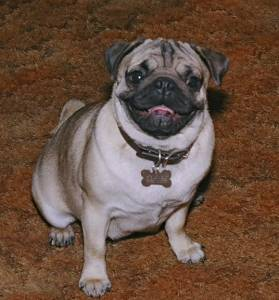

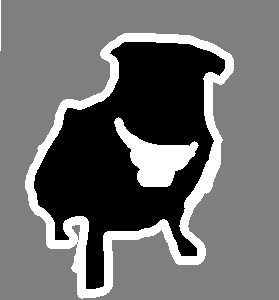

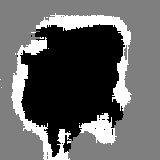

In [18]:
# Generate predictions for all images in the validation set

val_dataset = get_dataset(
	batch_size, img_size, val_input_img_paths, val_target_img_paths
)
val_preds = model.predict(val_dataset)


def display_mask(i):
	"""Quick utility to display a model's prediction."""
	mask = np.argmax(val_preds[i], axis=-1)
	mask = np.expand_dims(mask, axis=-1)
	img = ImageOps.autocontrast(keras.utils.array_to_img(mask))
	display(img)


# Display results for validation image #10
i = 10

# Display input image
display(Image(filename=val_input_img_paths[i]))

# Display ground-truth target mask
img = ImageOps.autocontrast(load_img(val_target_img_paths[i]))
display(img)

# Display mask predicted by our model
display_mask(i)  # Note that the model only sees inputs at 150x150.